In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
df = pd.read_csv("Social_Network_Ads.csv")

In [12]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [13]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
print(df.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [18]:
corr=df.corr(numeric_only=True)

In [19]:
corr

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [20]:
mask=np.zeros_like(corr,dtype=bool)

In [21]:
mask[np.triu_indices_from(mask)]=True

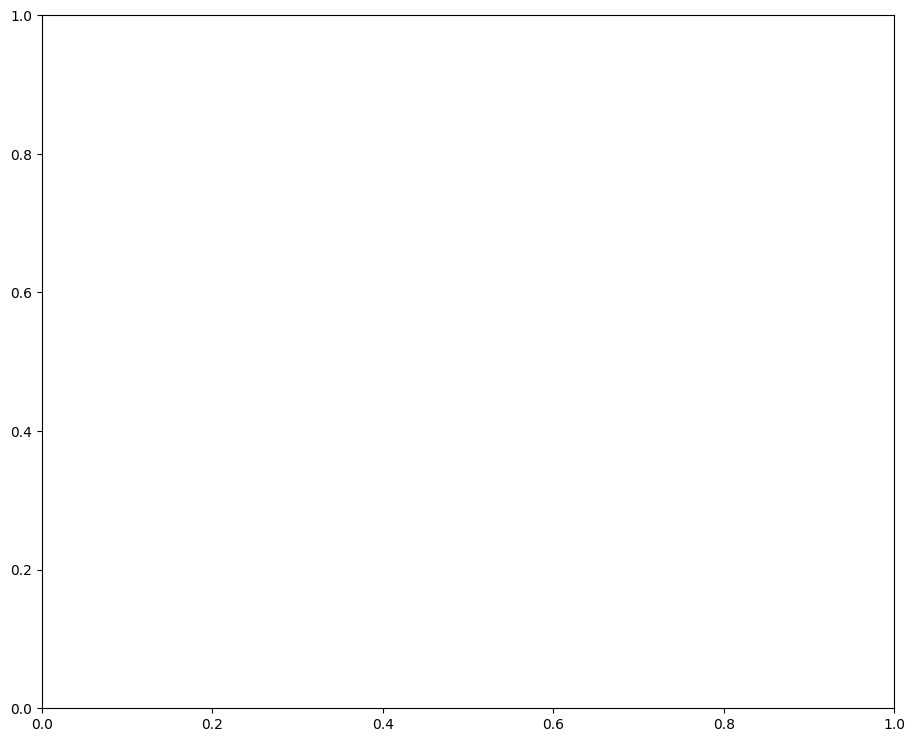

In [24]:
f,ax=plt.subplots(figsize=(11,9))

In [25]:
cmap = sns.diverging_palette(220,10,as_cmap=True)

<Axes: >

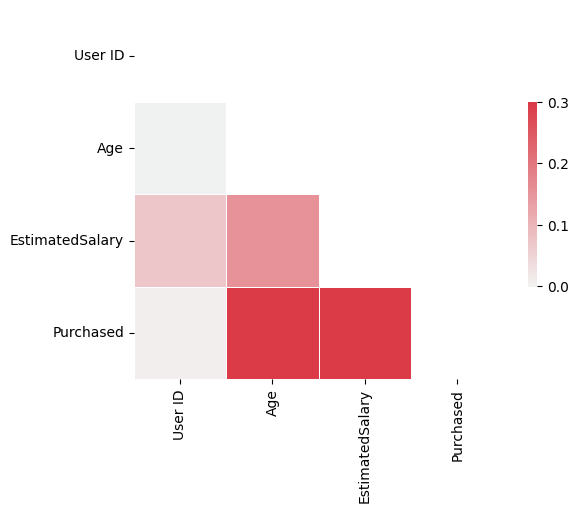

In [27]:
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [67]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc = StandardScaler()

In [72]:
x_train = sc.fit_transform(x_train)

In [73]:
x_test = sc.transform(x_test)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
classifier = LogisticRegression(random_state=0)

In [76]:
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [77]:
y_pred = classifier.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
cm = confusion_matrix(y_test,y_pred)

In [80]:
cm

array([[57,  1],
       [ 5, 17]])

In [81]:
accuracies = cross_val_score(estimator=classifier, X = x_train,y=y_train,cv=10)

In [82]:
'Mean Accuracy :{0:.2f}, Std of Accuracy: {1:.2f}'.format(accuracies.mean(),accuracies.std())

'Mean Accuracy :0.82, Std of Accuracy: 0.10'

In [83]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

In [87]:
print('Confusion Matrix\n\n',cm)
print('\n True Positives(TP) = ',cm[0,0])
print('\n True Negatives(TN) = ',cm[1,1])
print('\n False Positives(FP) = ',cm[0,1])
print('\n False Negatives(FN) = ',cm[1,0])

Confusion Matrix

 [[57  1]
 [ 5 17]]

 True Positives(TP) =  57

 True Negatives(TN) =  17

 False Positives(FP) =  1

 False Negatives(FN) =  5


In [88]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn)

In [89]:
Accuracy

np.float64(92.5)

In [91]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
precision = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

In [95]:
print(precision)
print(recall)
print(f1)

0.925
0.925
0.925
